In [24]:
import os
print(f"Directorio actual: {os.getcwd()}")


Directorio actual: c:\Users\Willi\Downloads\ProyectoClasificadorImagenes\NuevoClasificadorImagenesClima\Backend\model


In [25]:
import zipfile
zip_path = "weather-dataset.zip"  # Ruta relativa desde el directorio actual
extract_path = "../dataset"  # Extraer hacia "Backend/dataset"



# Descomprimir el archivo
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Dataset descomprimido en: {extract_path}")


Dataset descomprimido en: ../dataset


In [26]:
import os

dataset_dir = "Backend/dataset"
for root, dirs, files in os.walk(dataset_dir):
    for file in files:
        print(os.path.join(root, file))

In [27]:
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from collections import Counter

In [18]:
# Directorio del Dataset
data_dir = "Backend/dataset"


In [28]:
import os
print(os.getcwd())


c:\Users\Willi\Downloads\ProyectoClasificadorImagenes\NuevoClasificadorImagenesClima\Backend\model


In [29]:
import os

for root, dirs, files in os.walk(data_dir):
    print(f"Directorio: {root}")
    for name in dirs:
        print(f"  Carpeta: {name}")
    for name in files:
        print(f"  Archivo: {name}")


Directorio: ../dataset/dataset
  Carpeta: dew
  Carpeta: fogsmog
  Carpeta: frost
  Carpeta: glaze
  Carpeta: hail
  Carpeta: lightning
  Carpeta: rain
  Carpeta: rainbow
  Carpeta: rime
  Carpeta: sandstorm
  Carpeta: snow
Directorio: ../dataset/dataset\dew
  Archivo: 2208.jpg
  Archivo: 2209.jpg
  Archivo: 2210.jpg
  Archivo: 2211.jpg
  Archivo: 2212.jpg
  Archivo: 2213.jpg
  Archivo: 2214.jpg
  Archivo: 2215.jpg
  Archivo: 2216.jpg
  Archivo: 2217.jpg
  Archivo: 2218.jpg
  Archivo: 2219.jpg
  Archivo: 2220.jpg
  Archivo: 2221.jpg
  Archivo: 2222.jpg
  Archivo: 2223.jpg
  Archivo: 2224.jpg
  Archivo: 2225.jpg
  Archivo: 2226.jpg
  Archivo: 2227.jpg
  Archivo: 2228.jpg
  Archivo: 2229.jpg
  Archivo: 2230.jpg
  Archivo: 2231.jpg
  Archivo: 2232.jpg
  Archivo: 2233.jpg
  Archivo: 2234.jpg
  Archivo: 2235.jpg
  Archivo: 2236.jpg
  Archivo: 2237.jpg
  Archivo: 2238.jpg
  Archivo: 2239.jpg
  Archivo: 2240.jpg
  Archivo: 2241.jpg
  Archivo: 2242.jpg
  Archivo: 2243.jpg
  Archivo: 2244.jpg
 

In [30]:
# Directorio del Dataset
data_dir = "../dataset/dataset"

# Verificar si el directorio existe
if not os.path.exists(data_dir):
    print(f"El directorio {data_dir} no existe.")
else:
    # Listar las carpetas (clases)
    classes = os.listdir(data_dir)
    print(f"Clases encontradas: {classes}")


Clases encontradas: ['dew', 'fogsmog', 'frost', 'glaze', 'hail', 'lightning', 'rain', 'rainbow', 'rime', 'sandstorm', 'snow']


In [31]:
# Contar el número de imágenes por clase
image_count = {
    cls: len(os.listdir(os.path.join(data_dir, cls)))
    for cls in classes
}
print(f"Imágenes por clase: {image_count}")


Imágenes por clase: {'dew': 698, 'fogsmog': 851, 'frost': 475, 'glaze': 639, 'hail': 591, 'lightning': 377, 'rain': 526, 'rainbow': 232, 'rime': 1160, 'sandstorm': 692, 'snow': 621}


In [32]:
# Contar el número de imágenes por clase
image_count = {
    cls: len(os.listdir(os.path.join(data_dir, cls)))
    for cls in classes
}
print(f"Imágenes por clase: {image_count}")

Imágenes por clase: {'dew': 698, 'fogsmog': 851, 'frost': 475, 'glaze': 639, 'hail': 591, 'lightning': 377, 'rain': 526, 'rainbow': 232, 'rime': 1160, 'sandstorm': 692, 'snow': 621}


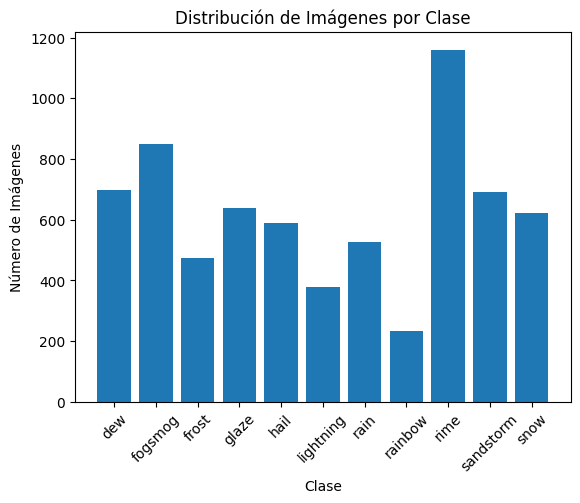

In [33]:
# Visualizar distribución de imágenes por clase
plt.bar(image_count.keys(), image_count.values())
plt.title('Distribución de Imágenes por Clase')
plt.xlabel('Clase')
plt.ylabel('Número de Imágenes')
plt.xticks(rotation=45)
plt.show()

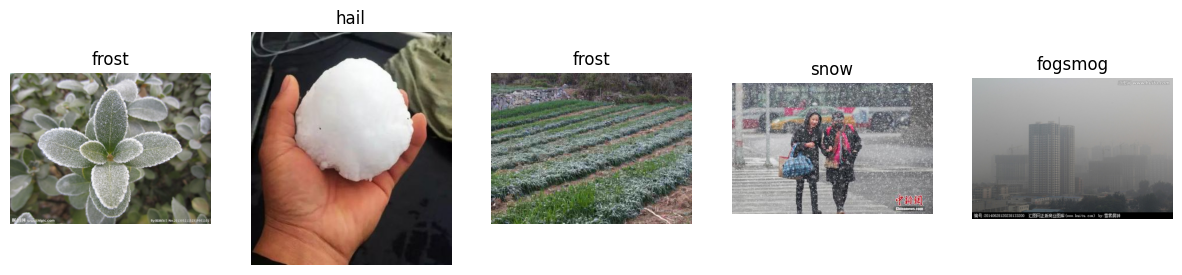

In [34]:
# Mostrar imágenes al azar
def show_random_images(data_dir, classes, num_images=5):
  fig, axes = plt.subplots(1, num_images, figsize=(15, 15))

  for ax in axes:
    cls = np.random.choice(classes)
    img_path = os.path.join(data_dir, cls, np.random.choice(os.listdir(os.path.join(data_dir, cls))))
    img = Image.open(img_path)
    ax.imshow(img)
    ax.set_title(cls)
    ax.axis('off')

  plt.show()

show_random_images(data_dir, classes)

In [35]:
import shutil
from sklearn.model_selection import train_test_split

In [41]:
# Establecer porcentajes para los conjuntos
validation_split = 0.15
test_split = 0.15
train_split = 1 - validation_split - test_split

# Configuración de directorios
train_dir = os.path.join(data_dir, 'train')
valid_dir = os.path.join(data_dir, 'valid')
test_dir = os.path.join(data_dir, 'test')

# Crear directorios de salida
os.makedirs(train_dir, exist_ok=True)
os.makedirs(valid_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [42]:
# Procesar cada clase
for cls in classes:
    cls_dir = os.path.join(data_dir, cls)

    # Ignorar carpetas que no sean clases
    if not os.path.isdir(cls_dir):
        continue

    # Obtener imágenes de la clase
    images = os.listdir(cls_dir)

    # Separar en entrenamiento, validación y prueba
    try:
      train_images, temp_images = train_test_split(images, test_size=(validation_split + test_split), random_state=42)
      valid_images, test_images = train_test_split(temp_images, test_size=(test_split / (validation_split + test_split)), random_state=42)
    except ValueError as e:
      print(f"Error al dividir las imágenes de la clase '{cls}': {e}")
      continue

    # Crear subcarpetas para la clase en cada conjunto
    os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(valid_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(test_dir, cls), exist_ok=True)

    # Mover imágenes a los conjuntos correspondientes
    for image in train_images:
        shutil.move(os.path.join(cls_dir, image), os.path.join(train_dir, cls, image))

    for image in valid_images:
        shutil.move(os.path.join(cls_dir, image), os.path.join(valid_dir, cls, image))

    for image in test_images:
        shutil.move(os.path.join(cls_dir, image), os.path.join(test_dir, cls, image))

print("Conjuntos creados con éxito:")
print(f"- Entrenamiento: {train_dir}")
print(f"- Validación: {valid_dir}")
print(f"- Prueba: {test_dir}")

Error al dividir las imágenes de la clase 'dew': With n_samples=0, test_size=0.3 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.
Error al dividir las imágenes de la clase 'fogsmog': With n_samples=0, test_size=0.3 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.
Error al dividir las imágenes de la clase 'frost': With n_samples=0, test_size=0.3 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.
Error al dividir las imágenes de la clase 'glaze': With n_samples=0, test_size=0.3 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.
Error al dividir las imágenes de la clase 'hail': With n_samples=0, test_size=0.3 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.
Error al dividir las imágenes de la clase 'lightning': With n

In [43]:
# Verificar las cantidades en cada conjunto
def count_images_in_directory(directory):
    total = 0
    for cls in os.listdir(directory):
        total += len(os.listdir(os.path.join(directory, cls)))
    return total

print(f"Imágenes en entrenamiento: {count_images_in_directory(train_dir)}")
print(f"Imágenes en validación: {count_images_in_directory(valid_dir)}")
print(f"Imágenes en prueba: {count_images_in_directory(test_dir)}")


Imágenes en entrenamiento: 4798
Imágenes en validación: 1031
Imágenes en prueba: 1033


In [44]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [45]:
# Preprocesamiento
data_gen = ImageDataGenerator(
    rescale=1./255,           # Normalización
    rotation_range=30,        # Aumento: rotaciones
    width_shift_range=0.2,    # Desplazamientos horizontales
    height_shift_range=0.2,   # Desplazamientos verticales
    zoom_range=0.2,           # Zoom aleatorio
    horizontal_flip=True,     # Volteo horizontal
    #validation_split=0.15     # Separación de validación
)

In [46]:
# Crear generadores de datos
train_gen = data_gen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

Found 4798 images belonging to 11 classes.


In [47]:
# Generadores de validación y prueba (sin aumento)
valid_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    valid_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

test_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 1031 images belonging to 11 classes.
Found 1033 images belonging to 11 classes.


In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [49]:
# Crear el modelo
model = Sequential([
    # Primera capa convolucional + pooling
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Segunda capa convolucional + pooling
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Tercera capa convolucional + pooling
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Primera capa convolucional adicional
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Aplanar y añadir capas densas
    Flatten(),

    # Primera capa densa
    Dense(256, activation='relu'),
    Dropout(0.5),  # Regularización para evitar sobreajuste

    # Segunda capa densa
    Dense(128, activation='relu'),
    Dropout(0.5),  # Regularización para evitar sobreajuste

    # Capa de salida
    Dense(len(classes), activation='softmax')
])

c:\Users\Willi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 687,051 (2.62 MB)

 Trainable params: 686,091 (2.62 MB)

 Non-trainable params: 960 (3.75 KB)

In [51]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=30,
    steps_per_epoch=train_gen.samples // train_gen.batch_size,
    validation_steps=valid_gen.samples // valid_gen.batch_size
)

c:\Users\Willi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 59s 378ms/step - accuracy: 0.3116 - loss: 2.5320 - val_accuracy: 0.1396 - val_loss: 2.9791
Epoch 2/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - accuracy: 0.5312 - loss: 1.3277 - val_accuracy: 0.1429 - val_loss: 2.8809
Epoch 3/30


c:\Users\Willi\AppData\Local\Programs\Python\Python310\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


149/149 ━━━━━━━━━━━━━━━━━━━━ 26s 178ms/step - accuracy: 0.4343 - loss: 1.6705 - val_accuracy: 0.1621 - val_loss: 2.4030
Epoch 4/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step - accuracy: 0.5625 - loss: 1.3517 - val_accuracy: 0.1429 - val_loss: 3.0324
Epoch 5/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 28s 186ms/step - accuracy: 0.4974 - loss: 1.5139 - val_accuracy: 0.4834 - val_loss: 1.5097
Epoch 6/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 166us/step - accuracy: 0.4062 - loss: 1.5729 - val_accuracy: 0.5714 - val_loss: 1.5234
Epoch 7/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 29s 194ms/step - accuracy: 0.5067 - loss: 1.4857 - val_accuracy: 0.5781 - val_loss: 1.2454
Epoch 8/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step - accuracy: 0.4062 - loss: 1.8215 - val_accuracy: 0.8571 - val_loss: 1.3297
Epoch 9/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 25s 170ms/step - accuracy: 0.5229 - loss: 1.4334 - val_accuracy: 0.4629 - val_loss: 1.4415
Epoch 10/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 134us/step - accuracy: 0.6562 - loss: 1.1279 - val_ac

In [52]:
# Evaluar el modelo con el conjunto de prueba
test_loss, test_accuracy = model.evaluate(test_gen, steps=test_gen.samples // test_gen.batch_size)

print(f"Precisión en el conjunto de prueba: {test_accuracy * 100:.2f}%")
print(f"Pérdida en el conjunto de prueba: {test_loss:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 261ms/step - accuracy: 0.6256 - loss: 1.1046
Precisión en el conjunto de prueba: 62.79%
Pérdida en el conjunto de prueba: 1.0720


In [53]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step


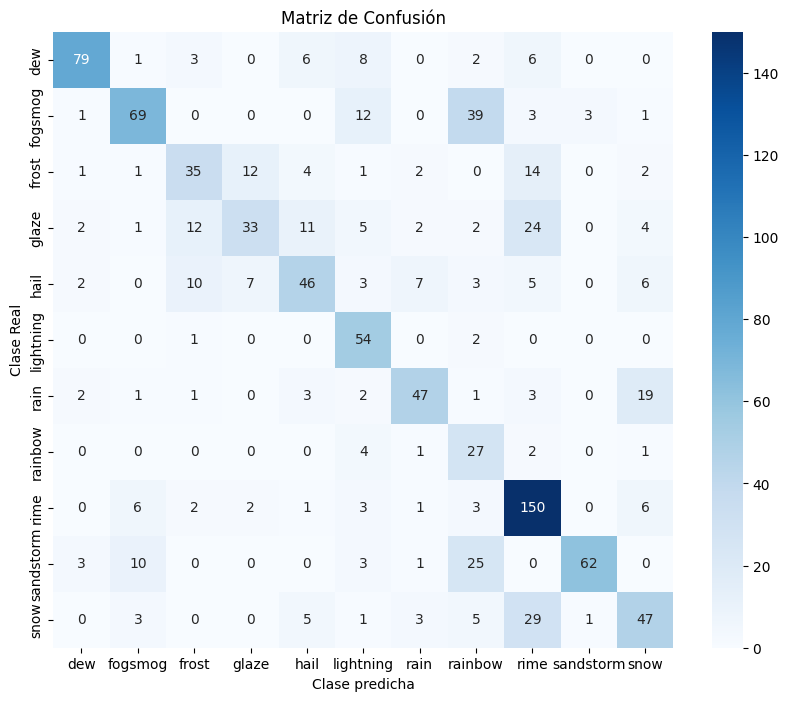


Reporte de Clasificación:
              precision    recall  f1-score   support

         dew       0.88      0.75      0.81       105
     fogsmog       0.75      0.54      0.63       128
       frost       0.55      0.49      0.51        72
       glaze       0.61      0.34      0.44        96
        hail       0.61      0.52      0.56        89
   lightning       0.56      0.95      0.71        57
        rain       0.73      0.59      0.66        79
     rainbow       0.25      0.77      0.38        35
        rime       0.64      0.86      0.73       174
   sandstorm       0.94      0.60      0.73       104
        snow       0.55      0.50      0.52        94

    accuracy                           0.63      1033
   macro avg       0.64      0.63      0.61      1033
weighted avg       0.68      0.63      0.63      1033



In [54]:
# Obtener predicciones
test_gen.reset()
predictions = model.predict(test_gen, steps=len(test_gen), verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

# Obtener etiquetas verdaderas
true_classes = test_gen.classes
class_labels = list(test_gen.class_indices.keys())

# Matriz de confusión
confusion_mtx = confusion_matrix(true_classes, predicted_classes)

# Visualizar matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Matriz de Confusión')
plt.ylabel('Clase Real')
plt.xlabel('Clase predicha')
plt.show()

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

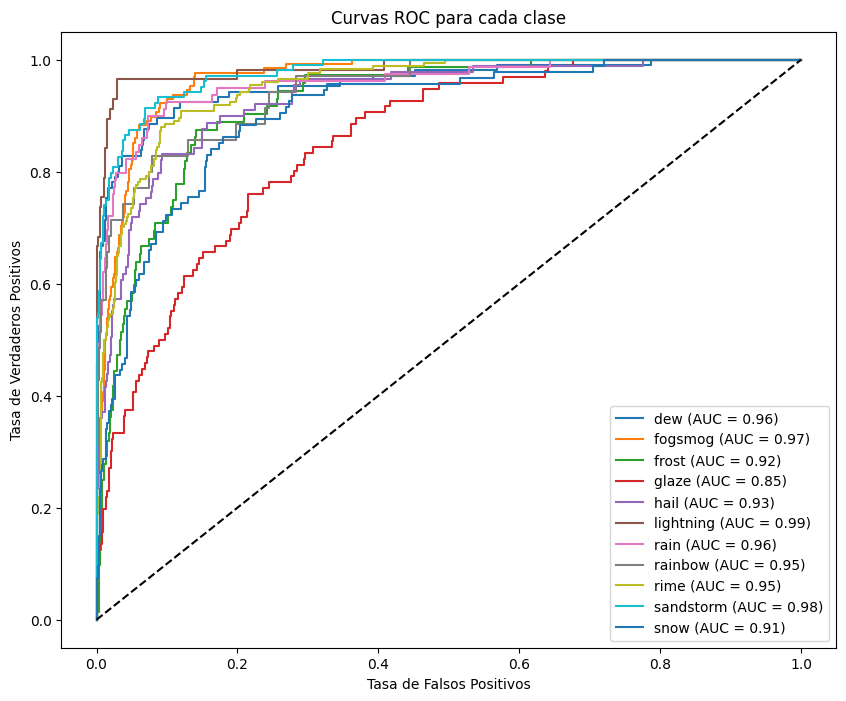

In [55]:
# prompt: Make the ROC curv graphic for all classes

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarizar las etiquetas
y_true_bin = label_binarize(true_classes, classes=np.arange(len(class_labels)))

# Calcular las curvas ROC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(class_labels)):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar las curvas ROC
plt.figure(figsize=(10, 8))
for i in range(len(class_labels)):
    plt.plot(fpr[i], tpr[i], label=f'{class_labels[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Línea de referencia
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC para cada clase')
plt.legend(loc='lower right')
plt.show()

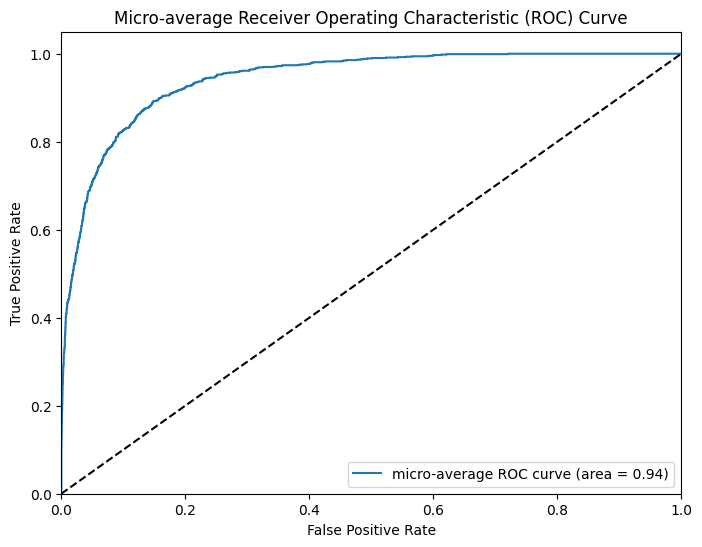

In [56]:
# Calculate micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), predictions.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot micro-average ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))

plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-average Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [57]:
# Especificar la ruta y el nombre del archivo donde se guardará el modelo
model_path = 'model/climate_classifier.h5'

# Guardar el modelo en formato HDF5 (.h5)
model.save(model_path)

print(f"Modelo guardado exitosamente en {model_path}")


Modelo guardado exitosamente en model/climate_classifier.h5


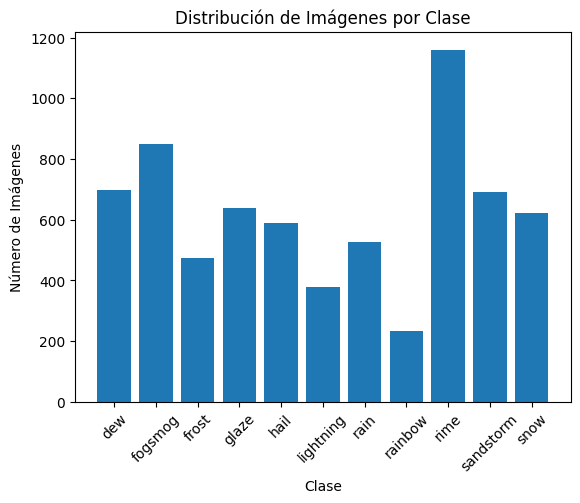

In [58]:
from PIL import Image

image_path = 'ruta/de/la/imagen.jpg'
image = Image.open(image_path).resize((64, 64))
image_array = np.array(image) / 255.0
image_array = np.expand_dims(image_array, axis=0)

prediction = model.predict(image_array)
predicted_class = CLASSES[np.argmax(prediction)]
confidence = np.max(prediction) * 100

print(f"Clase Predicha: {predicted_class}, Confianza: {confidence:.2f}%")
